In [55]:
import numpy as np
import pandas as pd

In [56]:
df = pd.read_csv('Ship_Performance_Dataset.csv')

In [57]:
df.head()

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,2023-06-04,Container Ship,NaN,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581


In [58]:
df.shape

(2736, 18)

In [59]:
df.isnull().sum()

Date                         0
Ship_Type                  136
Route_Type                 136
Engine_Type                136
Maintenance_Status         136
Speed_Over_Ground_knots      0
Engine_Power_kW              0
Distance_Traveled_nm         0
Draft_meters                 0
Weather_Condition          136
Cargo_Weight_tons            0
Operational_Cost_USD         0
Revenue_per_Voyage_USD       0
Turnaround_Time_hours        0
Efficiency_nm_per_kWh        0
Seasonal_Impact_Score        0
Weekly_Voyage_Count          0
Average_Load_Percentage      0
dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2736 non-null   object 
 1   Ship_Type                2600 non-null   object 
 2   Route_Type               2600 non-null   object 
 3   Engine_Type              2600 non-null   object 
 4   Maintenance_Status       2600 non-null   object 
 5   Speed_Over_Ground_knots  2736 non-null   float64
 6   Engine_Power_kW          2736 non-null   float64
 7   Distance_Traveled_nm     2736 non-null   float64
 8   Draft_meters             2736 non-null   float64
 9   Weather_Condition        2600 non-null   object 
 10  Cargo_Weight_tons        2736 non-null   float64
 11  Operational_Cost_USD     2736 non-null   float64
 12  Revenue_per_Voyage_USD   2736 non-null   float64
 13  Turnaround_Time_hours    2736 non-null   float64
 14  Efficiency_nm_per_kWh   

In [61]:
df.drop('Date', axis = 1, inplace = True)

In [62]:
df.fillna('unknown', inplace = True)

In [63]:
df.isnull().sum()

Ship_Type                  0
Route_Type                 0
Engine_Type                0
Maintenance_Status         0
Speed_Over_Ground_knots    0
Engine_Power_kW            0
Distance_Traveled_nm       0
Draft_meters               0
Weather_Condition          0
Cargo_Weight_tons          0
Operational_Cost_USD       0
Revenue_per_Voyage_USD     0
Turnaround_Time_hours      0
Efficiency_nm_per_kWh      0
Seasonal_Impact_Score      0
Weekly_Voyage_Count        0
Average_Load_Percentage    0
dtype: int64

<Axes: xlabel='Ship_Type'>

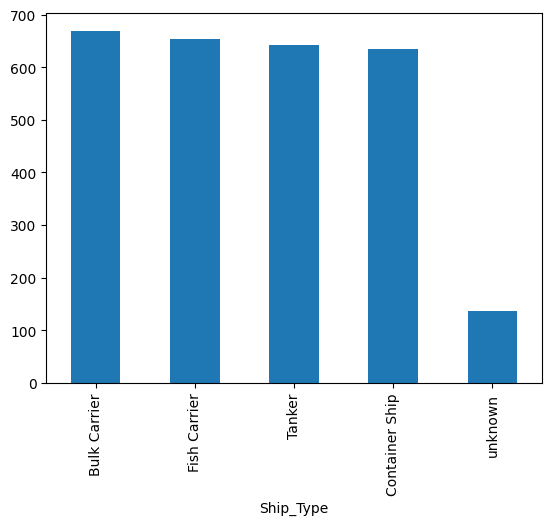

In [64]:
df['Ship_Type'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Route_Type'>

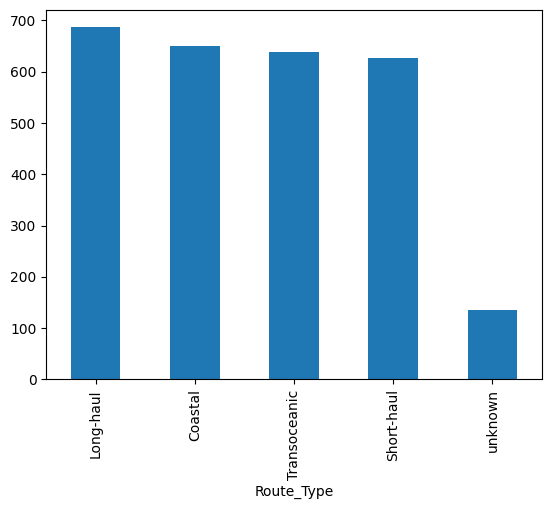

In [65]:
df['Route_Type'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Engine_Type'>

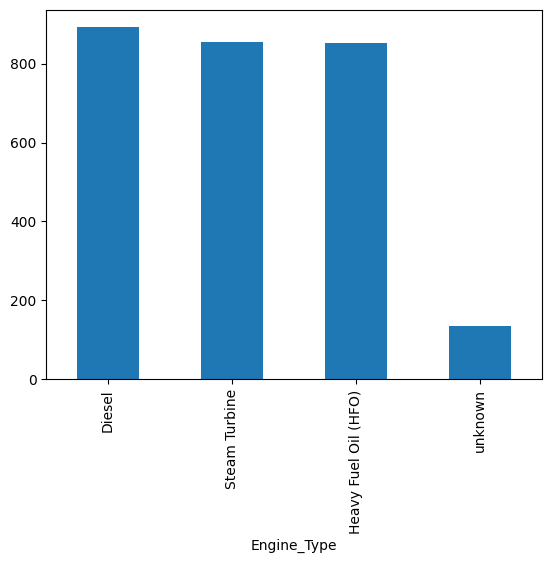

In [66]:
df['Engine_Type'].value_counts().plot(kind = 'bar')

In [67]:
df['Maintenance_Status'].value_counts()

Maintenance_Status
Good        873
Fair        867
Critical    860
unknown     136
Name: count, dtype: int64

In [68]:
df.Weather_Condition.value_counts()

Weather_Condition
Calm        893
Moderate    891
Rough       816
unknown     136
Name: count, dtype: int64

In [69]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [70]:
le = LabelEncoder()

In [71]:
df['Ship_Type'] = le.fit_transform(df['Ship_Type'])
df['Route_Type'] = le.fit_transform(df['Route_Type'])
df['Engine_Type'] = le.fit_transform(df['Engine_Type'])
df['Maintenance_Status'] = le.fit_transform(df['Maintenance_Status'])
df['Weather_Condition'] = le.fit_transform(df['Weather_Condition'])

In [72]:
df.head()

,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,1,4,1,0,12.597558,2062.983982,1030.943616,14.132284,1,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2,2,2,2,10.387580,1796.057415,1060.486382,14.653083,2,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,1,1,0,1,20.749747,1648.556685,658.874144,7.199261,1,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,0,3,2,1,21.055102,915.261795,1126.822519,11.789063,1,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2,3,0,1,13.742777,1089.721803,1445.281159,9.727833,1,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ship_Type                2736 non-null   int64  
 1   Route_Type               2736 non-null   int64  
 2   Engine_Type              2736 non-null   int64  
 3   Maintenance_Status       2736 non-null   int64  
 4   Speed_Over_Ground_knots  2736 non-null   float64
 5   Engine_Power_kW          2736 non-null   float64
 6   Distance_Traveled_nm     2736 non-null   float64
 7   Draft_meters             2736 non-null   float64
 8   Weather_Condition        2736 non-null   int64  
 9   Cargo_Weight_tons        2736 non-null   float64
 10  Operational_Cost_USD     2736 non-null   float64
 11  Revenue_per_Voyage_USD   2736 non-null   float64
 12  Turnaround_Time_hours    2736 non-null   float64
 13  Efficiency_nm_per_kWh    2736 non-null   float64
 14  Seasonal_Impact_Score   

In [76]:
df.shape

(2736, 17)

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
sc = StandardScaler()

In [80]:
df[['Speed_Over_Ground_knots']] = sc.fit_transform(df[['Speed_Over_Ground_knots']])

In [82]:
df[['Engine_Power_kW']] = sc.fit_transform(df[['Engine_Power_kW']])
df[['Distance_Traveled_nm']] = sc.fit_transform(df[['Distance_Traveled_nm']])
df[['Draft_meters']] = sc.fit_transform(df[['Draft_meters']])
df[['Cargo_Weight_tons']] = sc.fit_transform(df[['Cargo_Weight_tons']])
df[['Operational_Cost_USD']] = sc.fit_transform(df[['Operational_Cost_USD']])
df[['Revenue_per_Voyage_USD']] = sc.fit_transform(df[['Revenue_per_Voyage_USD']])
df[['Turnaround_Time_hours']] = sc.fit_transform(df[['Turnaround_Time_hours']])
df[['Average_Load_Percentage']] = sc.fit_transform(df[['Average_Load_Percentage']])

In [83]:
df.head()

,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,1,4,1,0,-1.161003,0.425980,-0.009608,1.461520,1,1.658525,1.623465,-0.845173,-0.900768,1.455179,1.415653,1,1.278649
1,2,2,2,2,-1.673617,0.053631,0.042355,1.642611,2,-1.557798,1.620311,1.336484,1.219556,0.290361,0.885648,6,1.287343
2,1,1,0,1,0.729934,-0.152125,-0.664052,-0.949214,1,-1.529788,1.372949,-0.469621,0.435091,0.499595,1.405813,9,1.447458
3,0,3,2,1,0.800762,-1.175035,0.159036,0.646741,1,1.261758,0.044058,-1.599821,-1.096910,0.702906,1.370704,1,-0.622127
4,2,3,0,1,-0.895364,-0.931672,0.719182,-0.069985,1,-1.381999,0.231250,0.570727,1.271175,1.331343,0.583383,8,0.330130


In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

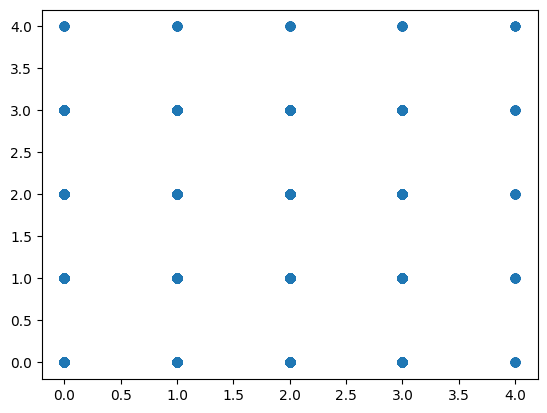

In [86]:
plt.scatter(df.Ship_Type, df.Route_Type)

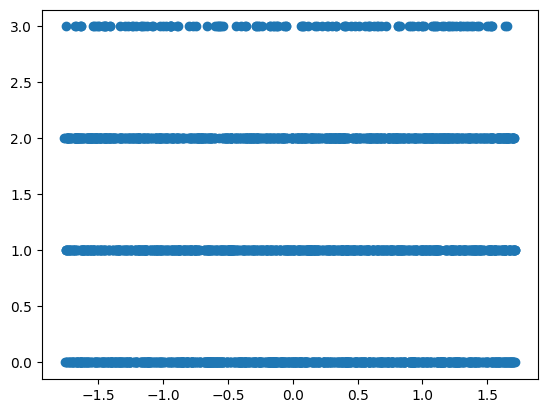

In [88]:
plt.scatter(df.Speed_Over_Ground_knots, df.Engine_Type)

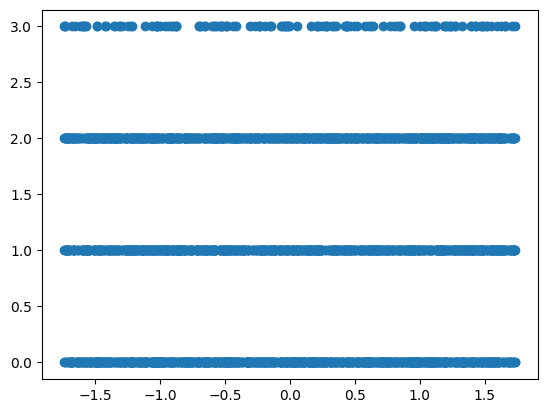

In [90]:
plt.scatter(df.Operational_Cost_USD, df.Engine_Type)

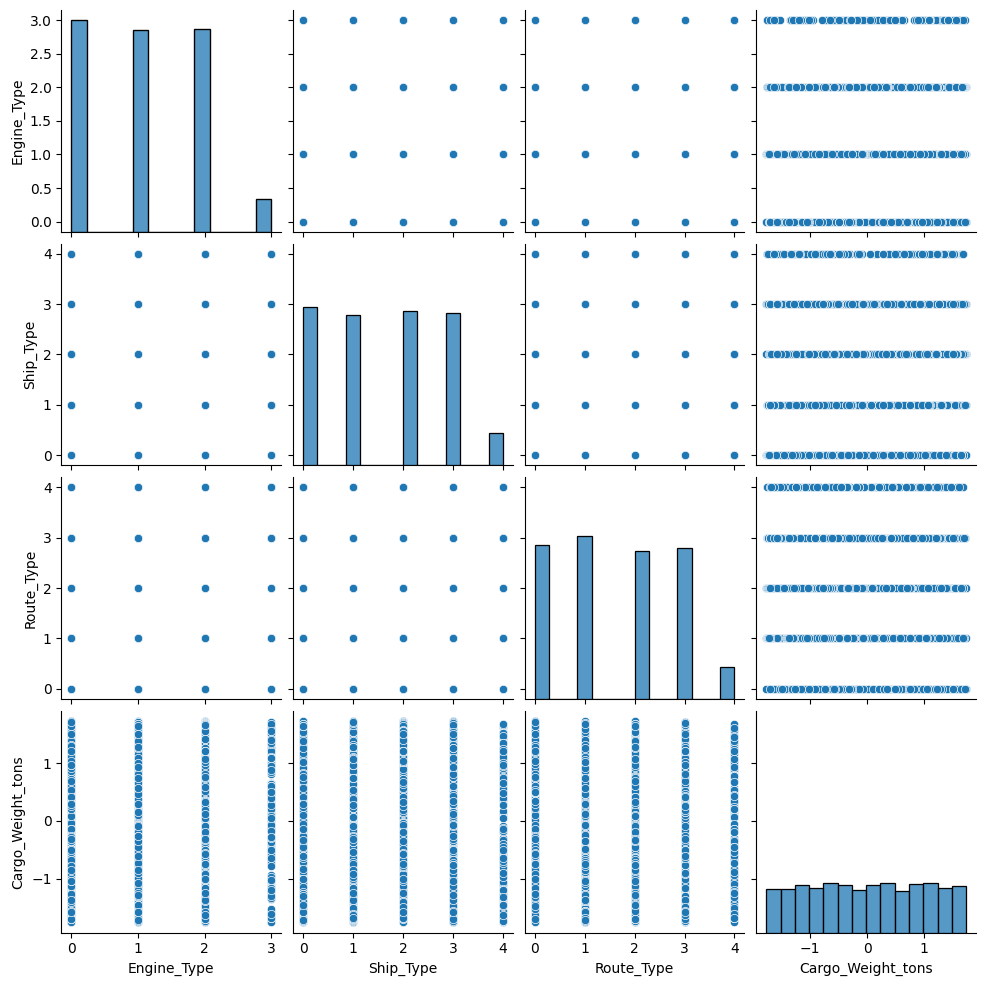

In [91]:
sns.pairplot(df[['Engine_Type','Ship_Type','Route_Type', 'Cargo_Weight_tons']])
plt.savefig('image.png')

In [92]:
from sklearn.cluster import KMeans

In [94]:
km = KMeans()
km.fit(df)

KMeans()

In [98]:
df['clust'] = km.predict(df)
df['clust']

0       5
1       0
2       6
3       5
4       7
       ..
2731    0
2732    5
2733    2
2734    5
2735    1
Name: clust, Length: 2736, dtype: int32

In [99]:
df['clust'].value_counts()

clust
5    414
1    393
6    368
2    347
0    318
4    312
7    309
3    275
Name: count, dtype: int64

In [100]:
df.head()

,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage,clust
0,1,4,1,0,-1.161003,0.425980,-0.009608,1.461520,1,1.658525,1.623465,-0.845173,-0.900768,1.455179,1.415653,1,1.278649,5
1,2,2,2,2,-1.673617,0.053631,0.042355,1.642611,2,-1.557798,1.620311,1.336484,1.219556,0.290361,0.885648,6,1.287343,0
2,1,1,0,1,0.729934,-0.152125,-0.664052,-0.949214,1,-1.529788,1.372949,-0.469621,0.435091,0.499595,1.405813,9,1.447458,6
3,0,3,2,1,0.800762,-1.175035,0.159036,0.646741,1,1.261758,0.044058,-1.599821,-1.096910,0.702906,1.370704,1,-0.622127,5
4,2,3,0,1,-0.895364,-0.931672,0.719182,-0.069985,1,-1.381999,0.231250,0.570727,1.271175,1.331343,0.583383,8,0.330130,7


In [101]:
df['clust'].nunique()

8

In [106]:
cen = km.cluster_centers_

In [107]:
df1 = df[df.clust==0]
df2 = df[df.clust==1]
df3 = df[df.clust==2]
df4 = df[df.clust==3]
df5 = df[df.clust==4]
df6 = df[df.clust==5]
df7 = df[df.clust==6]
df8 = df[df.clust==7]

In [108]:
df1.shape

(318, 18)

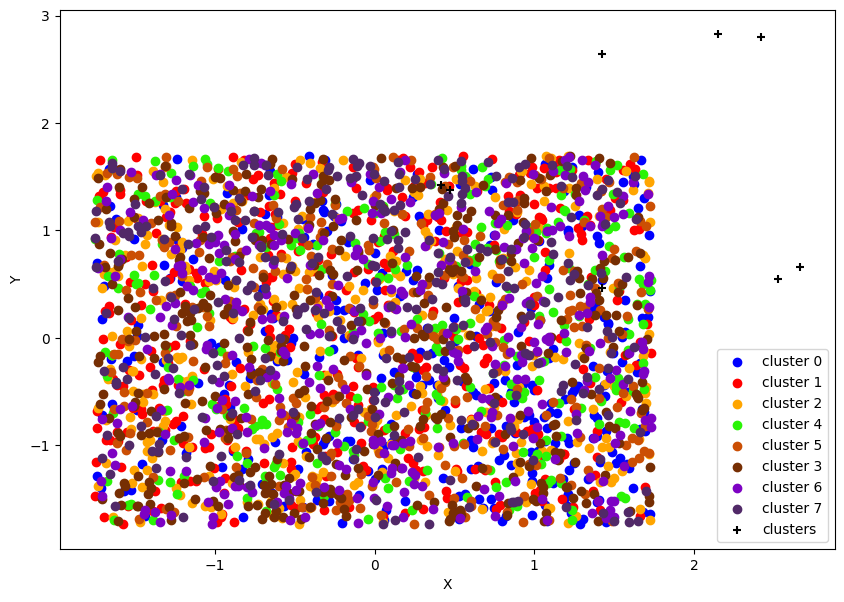

In [110]:
plt.figure(figsize=(10,7))

plt.scatter(df1.Engine_Power_kW, df1.Distance_Traveled_nm, color='blue', label='cluster 0')
plt.scatter(df2.Engine_Power_kW, df2.Distance_Traveled_nm, color='red', label='cluster 1')
plt.scatter(df3.Engine_Power_kW, df3.Distance_Traveled_nm, color='orange', label='cluster 2')
plt.scatter(df4.Engine_Power_kW, df4.Distance_Traveled_nm, color='#2af406', label='cluster 4')
plt.scatter(df5.Engine_Power_kW, df5.Distance_Traveled_nm, color='#cb4f04', label='cluster 5')
plt.scatter(df6.Engine_Power_kW, df6.Distance_Traveled_nm, color='#762e03', label='cluster 3')
plt.scatter(df7.Engine_Power_kW, df7.Distance_Traveled_nm, color='#7d02c3', label='cluster 6')
plt.scatter(df8.Engine_Power_kW, df8.Distance_Traveled_nm, color='#512968', label='cluster 7')

plt.scatter(cen[:,0] , cen[:,1] , color='black', label='clusters', marker='+')

plt.xlabel('X')
plt.ylabel('Y')

plt.legend()

In [112]:
km.inertia_

37468.56653406382

## object function

In [114]:
wcss = [ ]
clusetr = range(1,13)

for k in clusetr:
    km1 = KMeans(n_clusters=k)
    km1.fit(df)
    wcss.append(km.inertia_)

In [115]:
wcss

[37468.56653406382,
 37468.56653406382,
 37468.56653406382,
 37468.56653406382,
 37468.56653406382,
 37468.56653406382,
 37468.56653406382,
 37468.56653406382,
 37468.56653406382,
 37468.56653406382,
 37468.56653406382,
 37468.56653406382]

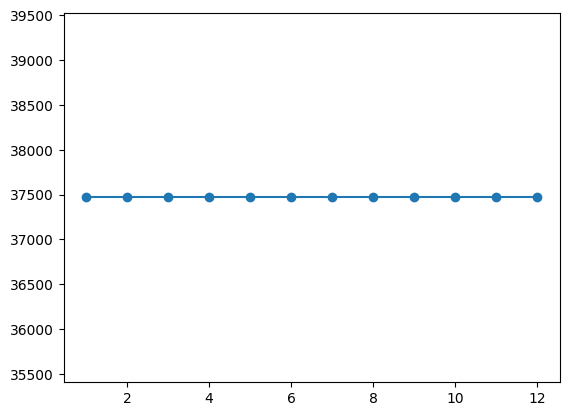

In [116]:
plt.plot(range(1,13),wcss, marker='o')

In [117]:
from kneed import KneeLocator as kn
kl = kn(clusetr, wcss, direction = 'decreasing', curve='convex')

C:\Users\Xen Kalurghat\AppData\Local\Programs\Python\Python313\Lib\site-packages\kneed\knee_locator.py:225: RuntimeWarning: invalid value encountered in divide
  return (a - min(a)) / (max(a) - min(a))


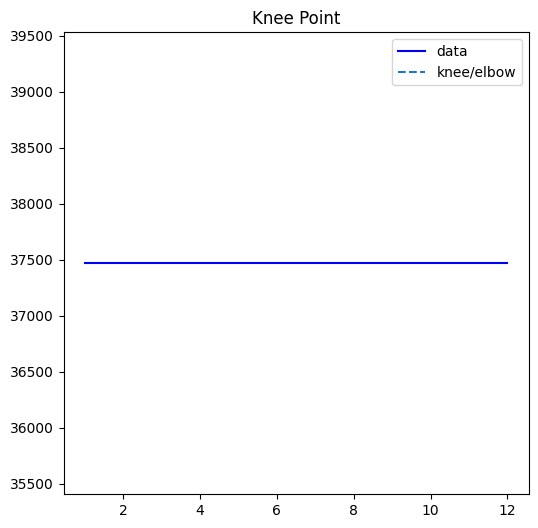

In [118]:
kl.plot_knee()

In [133]:
km1 = KMeans(n_clusters=5)

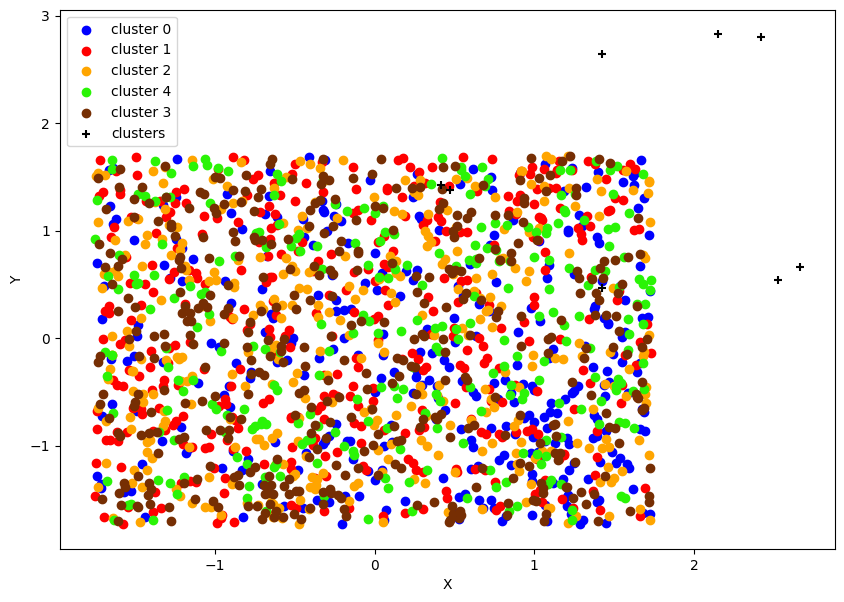

In [136]:
plt.figure(figsize=(10,7))

plt.scatter(df1.Engine_Power_kW, df1.Distance_Traveled_nm, color='blue', label='cluster 0')
plt.scatter(df2.Engine_Power_kW, df2.Distance_Traveled_nm, color='red', label='cluster 1')
plt.scatter(df3.Engine_Power_kW, df3.Distance_Traveled_nm, color='orange', label='cluster 2')
plt.scatter(df4.Engine_Power_kW, df4.Distance_Traveled_nm, color='#2af406', label='cluster 4')
plt.scatter(df6.Engine_Power_kW, df6.Distance_Traveled_nm, color='#762e03', label='cluster 3')


plt.scatter(cen[:,0] , cen[:,1] , color='black', label='clusters', marker='+')

plt.xlabel('X')
plt.ylabel('Y')

plt.legend()